<a href="https://colab.research.google.com/github/micah-shull/superstore/blob/main/004_superstore_SALES_Catgeory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import & Process Data

Dataset loaded successfully!
Missing Data:  0
Step 0: Removing outliers from column 'Sales'...

Column: Sales
Original Dataset: 9994 rows
Non-Outliers: 8827 rows (88.32%)
Outliers: 1167 rows (11.68%)


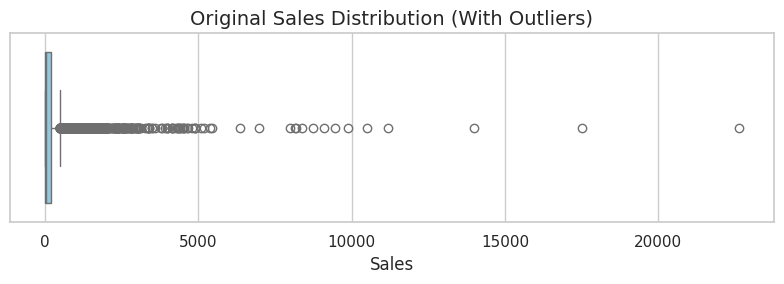

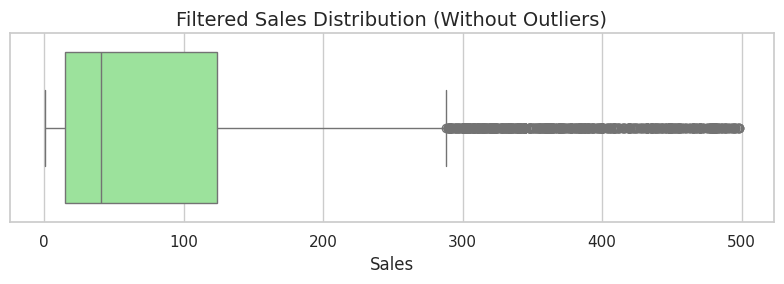

Outliers detected: 1167 rows sequestered for separate analysis.

Step 1: Preprocessing the data...
Step 2: Adding time-based columns...
Step 3: Converting to category and visualizing...



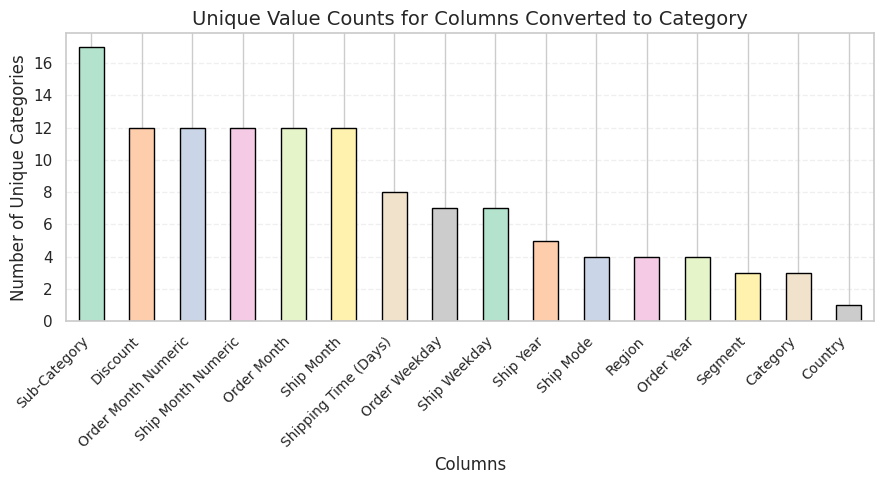


Step 4: Removing duplicates...
Removed 0 duplicate rows.
Step 5: Standardizing selected categorical columns...

Step 6: Ordering categorical columns...
Step 7: Adding abbreviated columns...
Data preparation completed!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8827 entries, 0 to 8826
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Row ID                     8827 non-null   int64         
 1   Order ID                   8827 non-null   object        
 2   Order Date                 8827 non-null   datetime64[ns]
 3   Ship Date                  8827 non-null   datetime64[ns]
 4   Ship Mode                  8827 non-null   category      
 5   Customer ID                8827 non-null   object        
 6   Customer Name              8827 non-null   object        
 7   Segment                    8827 non-null   category      
 8   Country                    8827 non-nul

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the updated script
import importlib
import data_prep_utils as dpu
import data_visualization_utils as dvu
importlib.reload(dpu)

# Load the dataset
file_path = '/content/sample-superstore.xls'
data = pd.read_excel(file_path)

print("Dataset loaded successfully!")
print("Missing Data: ", data.isnull().sum().sum())

# Prepare the dataset
exclude_columns = ['Profit per Category', 'Profit per Sub-Category', 'Regional Market Share (%)', 'Quantity', 'Order Count']
data = dpu.prepare_data(data, outlier_column='Sales', exclude_columns=exclude_columns)

# Final check
print(data.info())

## Overall Sales Distribution Visualizations

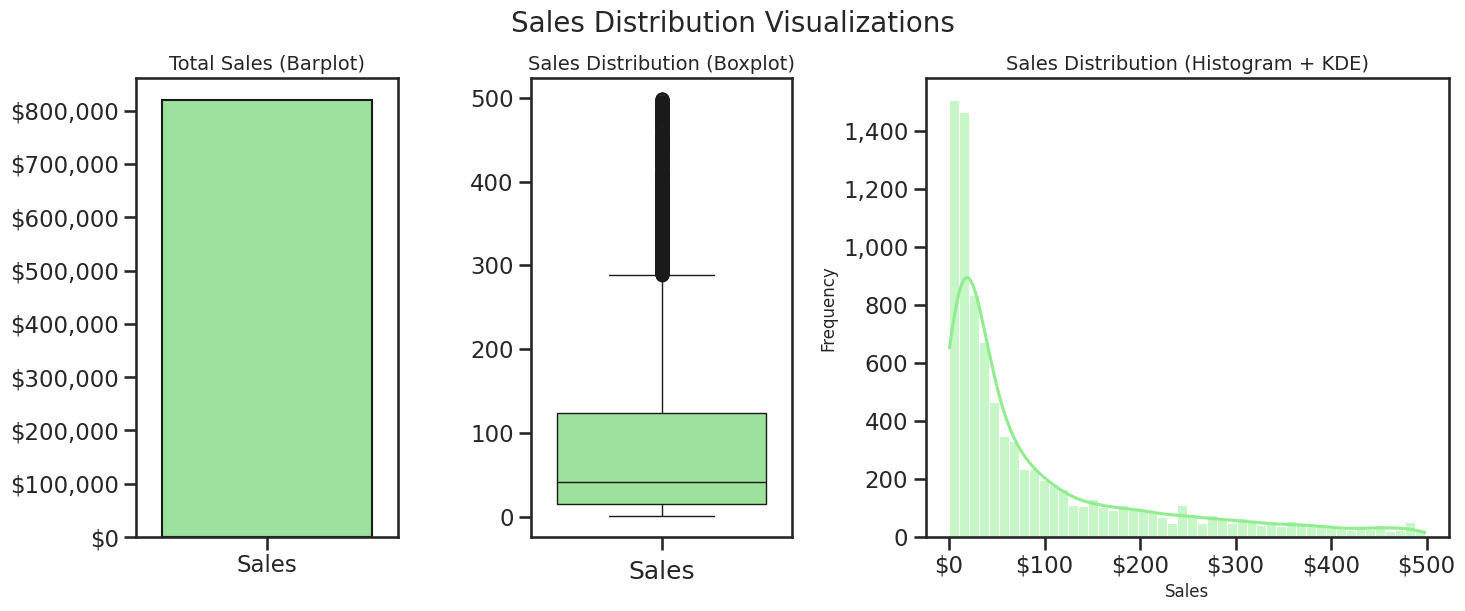

In [ ]:
# Set Seaborn theme
sns.set_theme(style="whitegrid", context="notebook")
dvu.plot_sales_distribution(data, column='Sales', title='Sales Distribution Visualizations', color='lightgreen')

### Sales by Category over Time

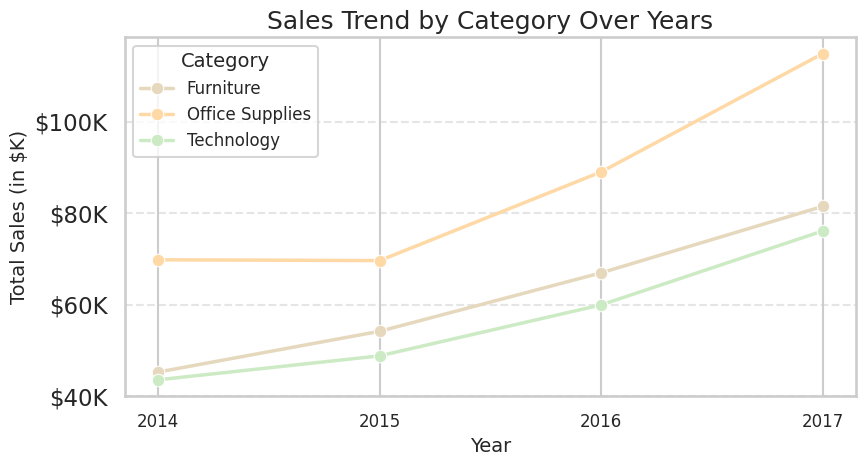

In [ ]:
# Set up Seaborn theme
sns.set_theme(style="whitegrid", context="talk")

# Step 1: Aggregate sales by category and year
category_year_sales = (
    data.groupby(['Order Year', 'Category'], observed=True)['Sales']
    .sum()
    .reset_index()
)

# Step 2: Convert sales to thousands for readability
category_year_sales['Sales (in $K)'] = category_year_sales['Sales'] / 1000

# Step 3: Create the line plot with trendlines
plt.figure(figsize=(9,5))
sns.lineplot(
    data=category_year_sales,
    x='Order Year',
    y='Sales (in $K)',
    hue='Category',
    marker='o',
    palette="Pastel1_r",
    linewidth=2.5
)

# Add formatting
plt.title("Sales Trend by Category Over Years", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Sales (in $K)", fontsize=14)
plt.xticks(category_year_sales['Order Year'].unique(), fontsize=12)  # Ensure years are displayed correctly
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}K"))
plt.legend(title="Category", fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

## Sales by Category

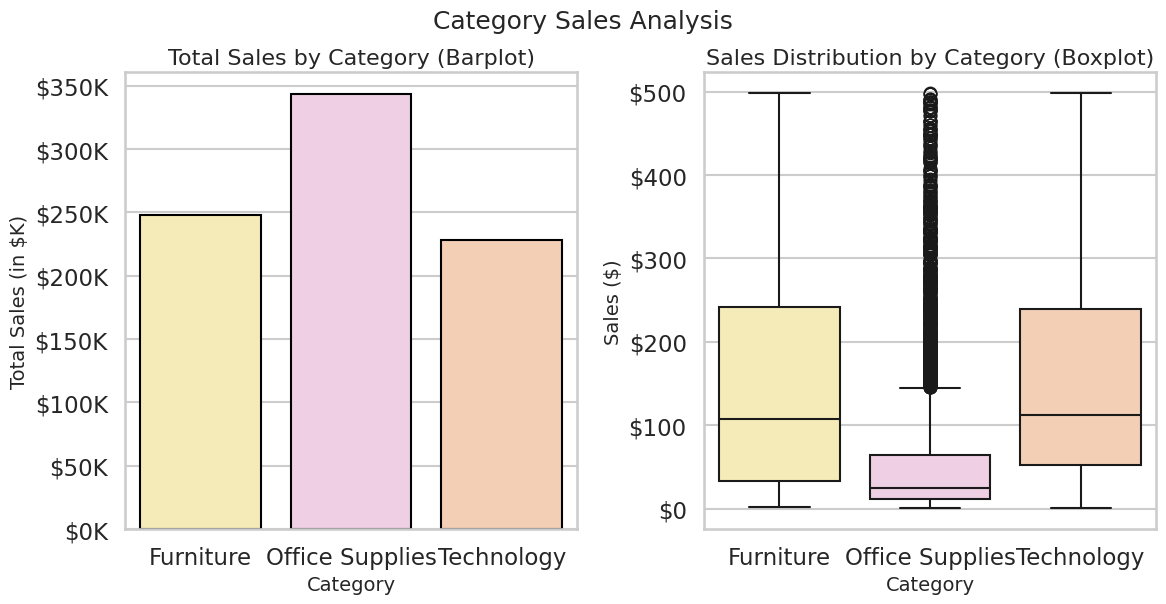

In [ ]:
# Set up Seaborn theme
sns.set_theme(style="whitegrid", context="talk")
palette = "Pastel2_r"

# Step 1: Aggregate sales by category
category_sales = data.groupby('Category', observed=True)['Sales'].sum()

# Step 2: Convert sales to thousands for readability
category_sales_k = category_sales / 1000

# Step 3: Create a 1x2 grid for visualization
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot 1: Total Sales by Category (Barplot)
sns.barplot(
    x=category_sales_k.index,
    y=category_sales_k.values,
    hue=category_sales_k.index,
    palette=palette,
    edgecolor="black",
    ax=axes[0],
    dodge=False
)
axes[0].set_title("Total Sales by Category (Barplot)", fontsize=16)
axes[0].set_xlabel("Category", fontsize=14)
axes[0].set_ylabel("Total Sales (in $K)", fontsize=14)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}K"))
# axes[0].legend_.remove()  # Remove redundant legend

# Plot 2: Sales Distribution by Category (Boxplot)
sns.boxplot(
    data=data,
    x="Category",
    y="Sales",
    hue="Category",
    palette=palette,
    linewidth=1.5, linecolor='k',
    ax=axes[1]
)
axes[1].set_title("Sales Distribution by Category (Boxplot)", fontsize=16)
axes[1].set_xlabel("Category", fontsize=14)
axes[1].set_ylabel("Sales ($)", fontsize=14)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
# axes[1].legend_.remove()  # Remove redundant legend

# Adjust layout
plt.tight_layout()
plt.suptitle("Category Sales Analysis", fontsize=18, y=1.02)
plt.show()



## Descriptive Statistics

In [ ]:
data.groupby('Category', observed=True)['Sales'].agg(['sum', 'mean', 'median', 'max', 'min']).reset_index()

,Category,sum,mean,median,max,min
0,Furniture,247877.6984,149.865598,107.651,498.26,1.892
1,Office Supplies,343425.0040,59.976424,25.344,497.94,0.444
2,Technology,228415.3530,157.854425,111.980,498.00,0.990


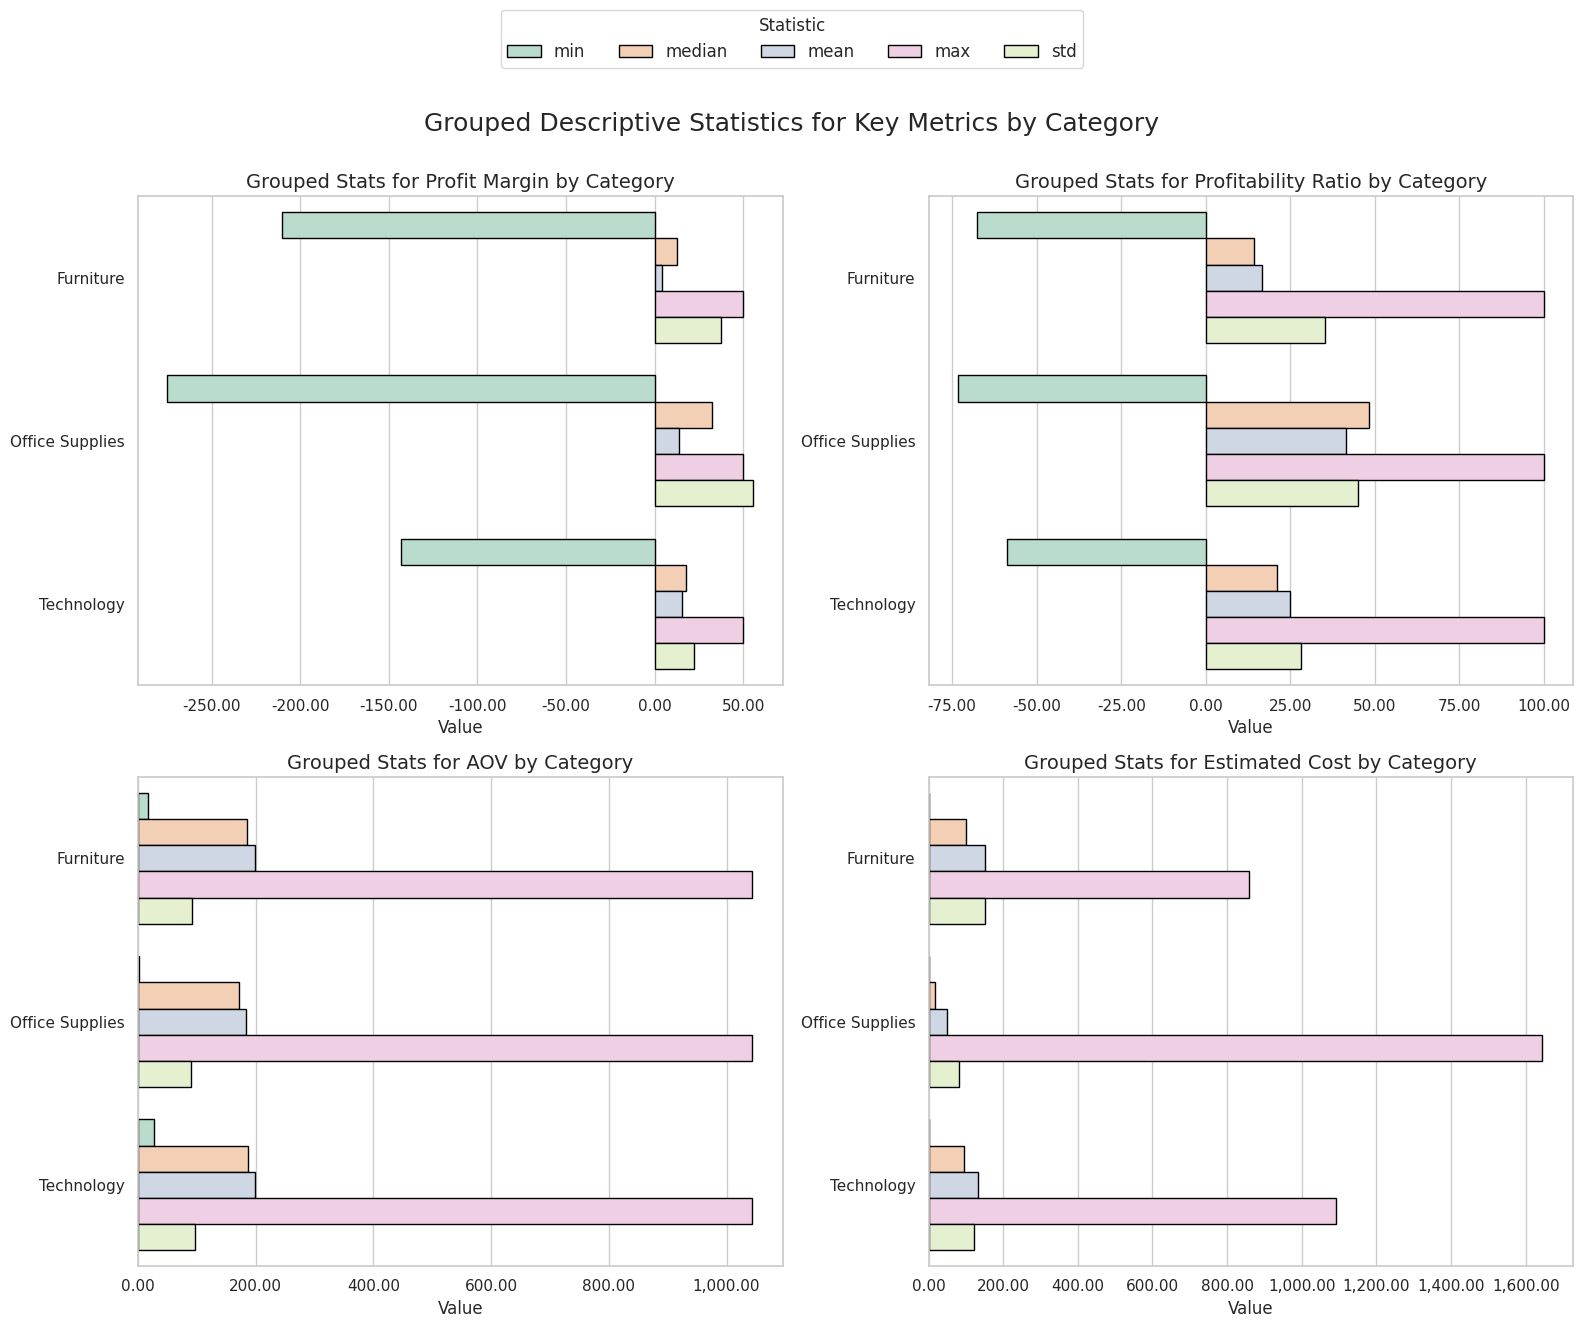

In [ ]:
# Define the columns to analyze
columns_to_analyze = ['Profit Margin', 'Profitability Ratio', 'AOV', 'Estimated Cost']

# Create a 2x2 grid for grouped descriptive stats
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Set Seaborn theme and color palette
sns.set_theme(style="whitegrid", context="notebook")
color_palette = "Pastel2"

# Iterate through columns and corresponding axes
for col, ax in zip(columns_to_analyze, axes.flatten()):
    # Calculate grouped stats for the column
    grouped_stats = data.groupby("Category", observed=True)[col].agg(
        min="min",
        median="median",
        mean="mean",
        max="max",
        std="std"
    ).reset_index()

    # Melt the DataFrame for easier plotting
    melted_stats = grouped_stats.melt(
        id_vars="Category",
        var_name="Statistic",
        value_name="Value"
    )

    # Create the barplot
    sns.barplot(
        data=melted_stats,
        x="Value", y="Category", hue="Statistic",
        palette=color_palette,
        edgecolor="black",
        ax=ax
    )

    # Format the plot
    ax.set_title(f"Grouped Stats for {col} by Category", fontsize=14)
    ax.set_xlabel("Value", fontsize=12)
    ax.set_ylabel("")
    ax.legend_.remove()  # Remove legend for individual plots
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.2f}"))

# Add a single legend for the entire grid
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="Statistic", fontsize=12, loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=5)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle("Grouped Descriptive Statistics for Key Metrics by Category", fontsize=18, y=1.02)
plt.show()


### Sales by Month


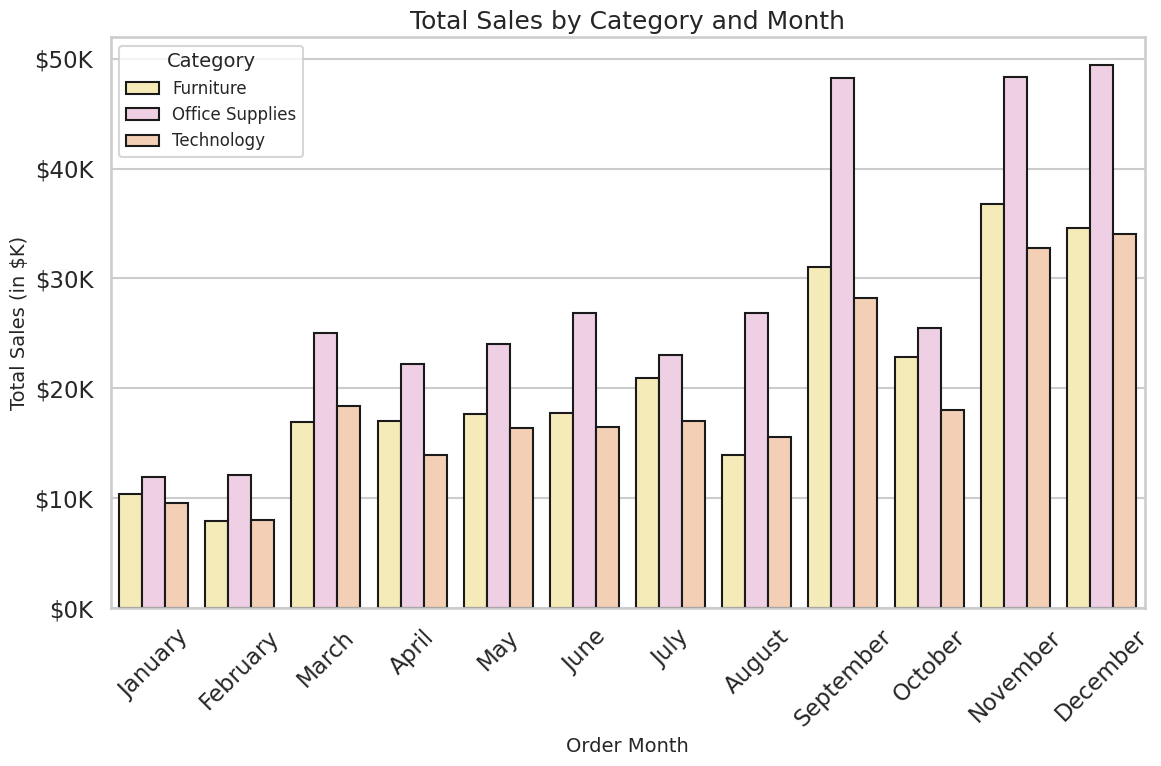

In [ ]:
# Set up Seaborn theme
sns.set_theme(style="whitegrid", context="talk")

# Step 1: Aggregate sales by category and month
category_month_sales = (
    data.groupby(['Order Month', 'Category'], observed=True)['Sales']
    .sum()
    .reset_index()
)

# Step 2: Convert sales to thousands for readability
category_month_sales['Sales (in $K)'] = category_month_sales['Sales'] / 1000

# Step 3: Create the barplot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=category_month_sales,
    x='Order Month',
    y='Sales (in $K)',
    hue='Category',
    palette='Pastel2_r',
    edgecolor='k'
)

# Add formatting
plt.title("Total Sales by Category and Month", fontsize=18)
plt.xlabel("Order Month", fontsize=14)
plt.ylabel("Total Sales (in $K)", fontsize=14)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}K"))
plt.legend(title="Category", fontsize=12, title_fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


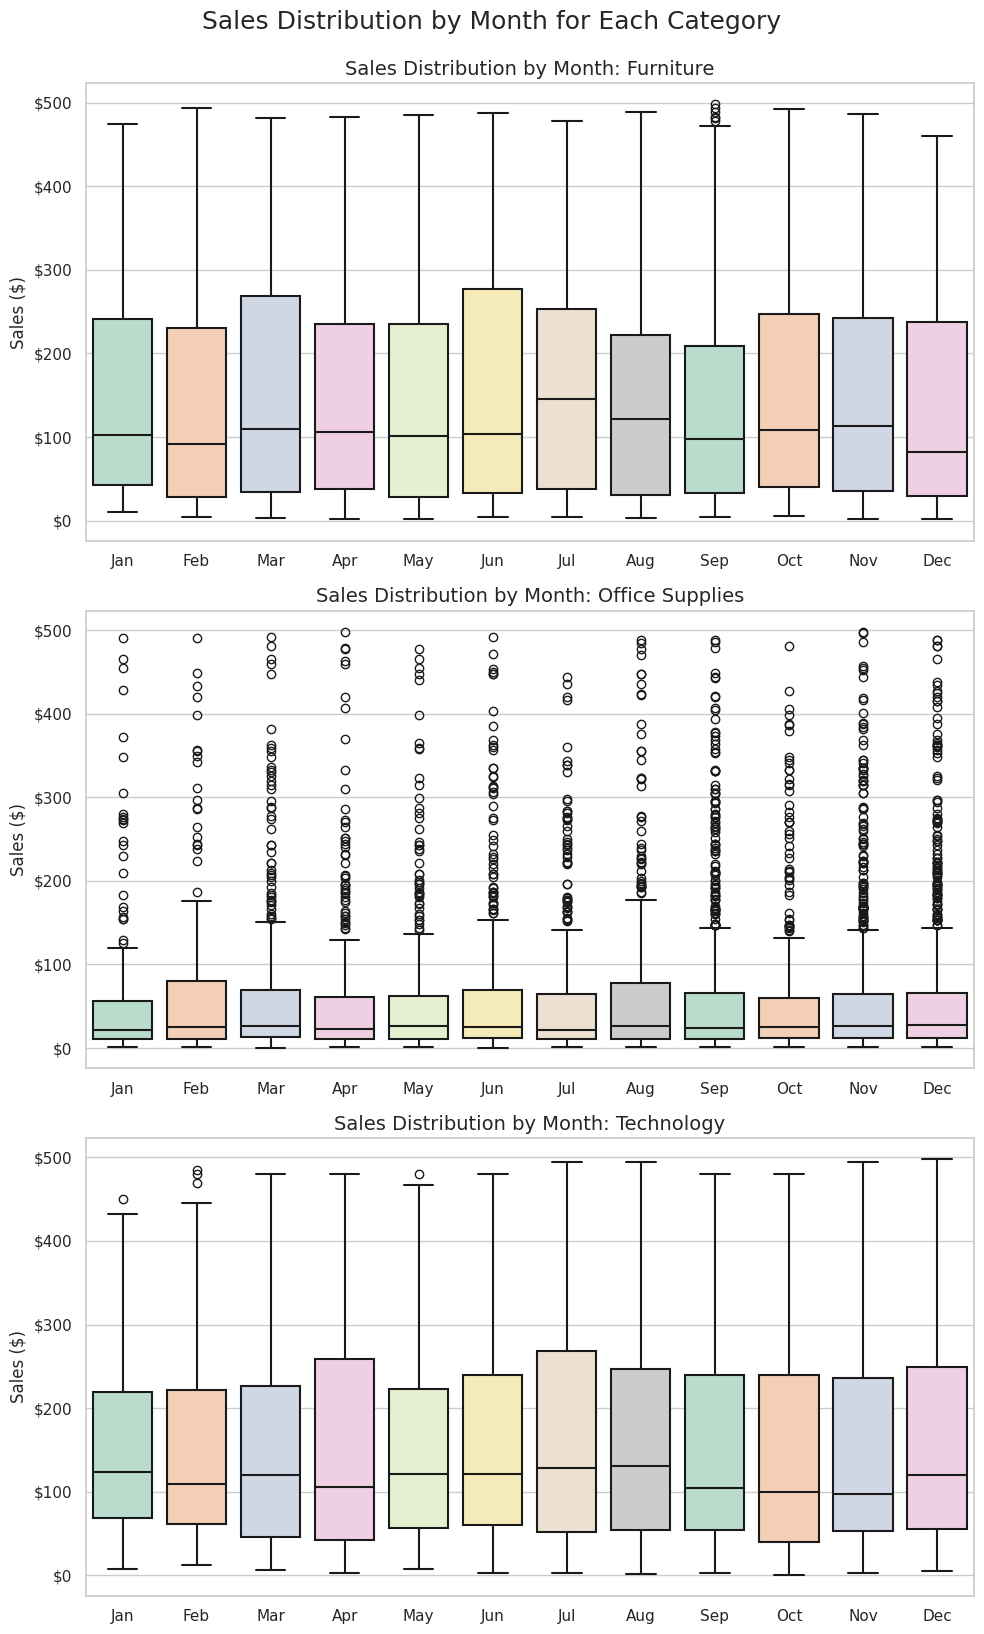

In [ ]:
# Set Seaborn theme
sns.set_theme(style="whitegrid", context="notebook")
palette = "Pastel2"

# Create the 3x1 grid for the plots
categories = data['Category'].cat.categories  # Get unique categories
fig, axes = plt.subplots(3, 1, figsize=(10, 16), sharey=True)

for i, category in enumerate(categories):
    # Filter data for each category
    category_data = data[data['Category'] == category]

    # Plot boxplot
    sns.boxplot(
        data=category_data,
        x="Order Month Abbrev",
        y="Sales",
        hue="Order Month Abbrev", palette=palette,
        linecolor="k",
        showfliers=True,
        linewidth=1.5,
        ax=axes[i]
    )

    # Format subplot
    axes[i].set_title(f"Sales Distribution by Month: {category}", fontsize=14)
    axes[i].set_xlabel("")  # Remove x-axis label
    axes[i].set_ylabel("Sales ($)", fontsize=12)
    # axes[i].tick_params(axis="x", rotation=45)
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Add overall title and adjust layout
plt.tight_layout()
plt.suptitle("Sales Distribution by Month for Each Category", fontsize=18, y=1.02)
plt.show()


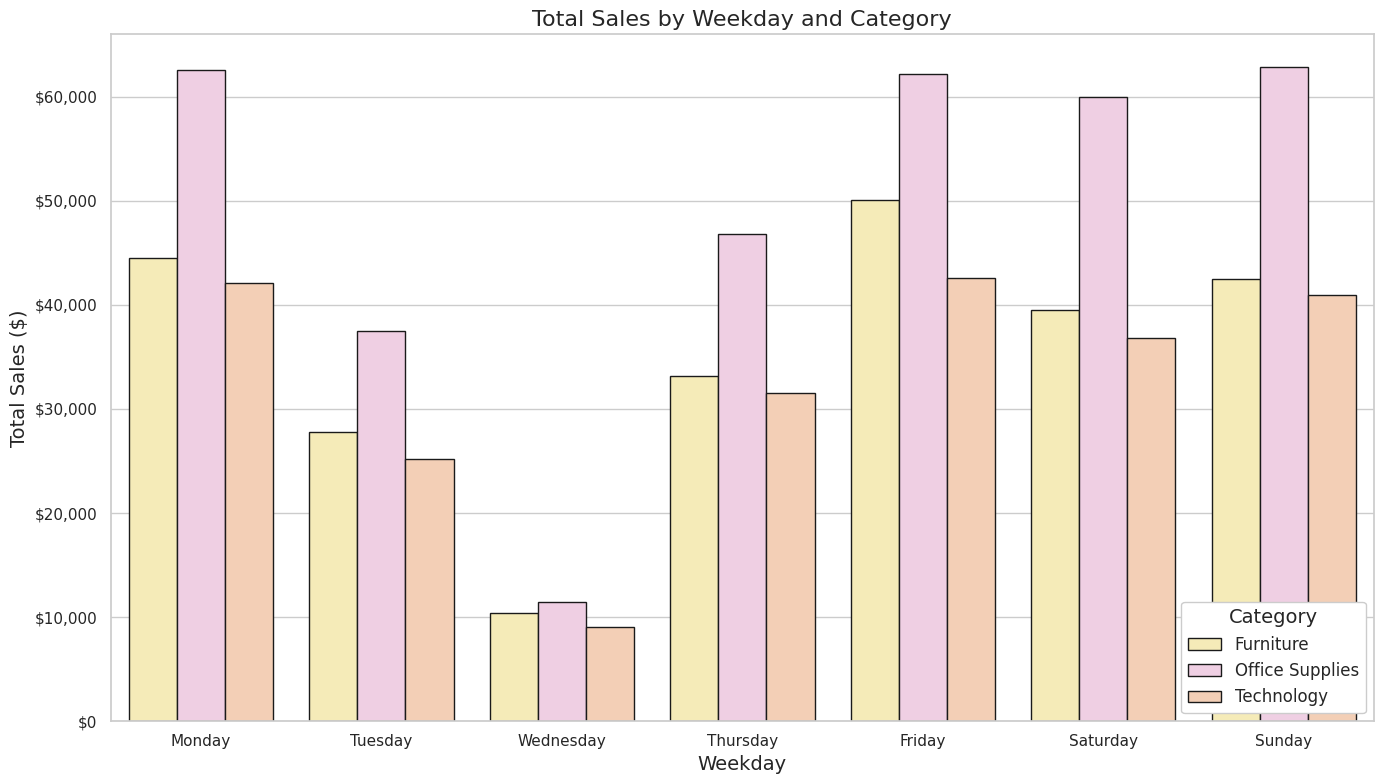

In [ ]:
# Set Seaborn theme
sns.set_theme(style="whitegrid", context="notebook")
palette = "Pastel2_r"

# Aggregate sales by weekday and category
weekday_category_sales = (
    data.groupby(['Order Weekday', 'Category'], observed=True)['Sales']
    .sum()
    .reset_index()
)

# Plot sales by weekday and category
plt.figure(figsize=(14, 8))
sns.barplot(
    data=weekday_category_sales,
    x="Order Weekday",
    y="Sales",
    hue="Category",
    palette=palette,
    edgecolor="k"
)

# Add labels and title
plt.title("Total Sales by Weekday and Category", fontsize=16)
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Total Sales ($)", fontsize=14)
# plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
plt.legend(title="Category", fontsize=12, title_fontsize=14, loc='lower right', framealpha=1)

# Adjust layout
plt.tight_layout()
plt.show()


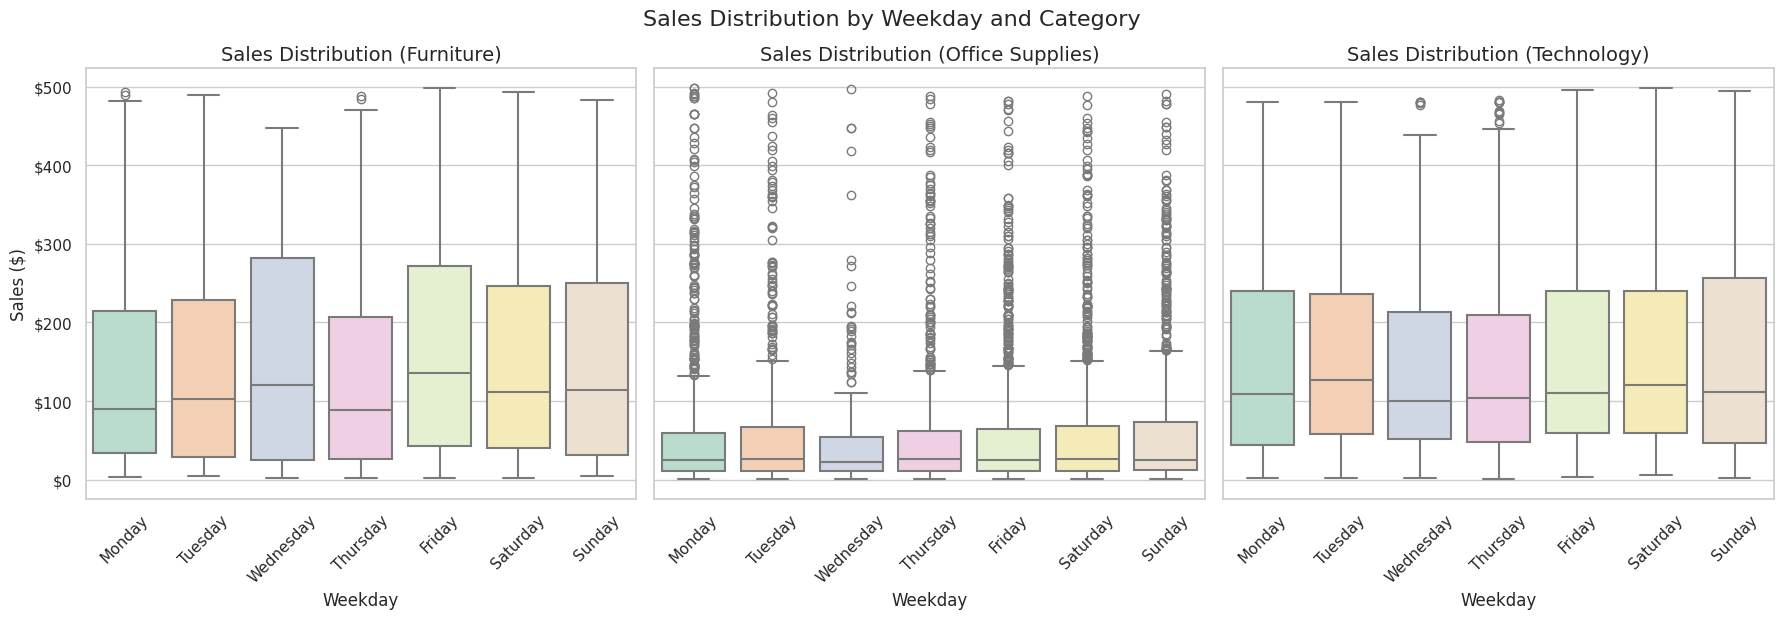

In [ ]:
# Set Seaborn theme
sns.set_theme(style="whitegrid", context="notebook")
palette = "Pastel2"

# Create the 1x3 grid for boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Categories for iteration
categories = data['Category'].cat.categories

# Loop through categories and create boxplots
for i, category in enumerate(categories):
    sns.boxplot(
        data=data[data['Category'] == category],
        x="Order Weekday",
        y="Sales",
        hue='Order Weekday', palette=palette,
        linewidth=1.5,
        showfliers=True,  # Show outliers
        ax=axes[i]
    )
    axes[i].set_title(f"Sales Distribution ({category})", fontsize=14)
    axes[i].set_xlabel("Weekday", fontsize=12)
    axes[i].set_ylabel("Sales ($)" if i == 0 else "", fontsize=12)  # Label y-axis only on the first plot
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Adjust layout
plt.tight_layout()
plt.suptitle("Sales Distribution by Weekday and Category", fontsize=16, y=1.03)
plt.show()


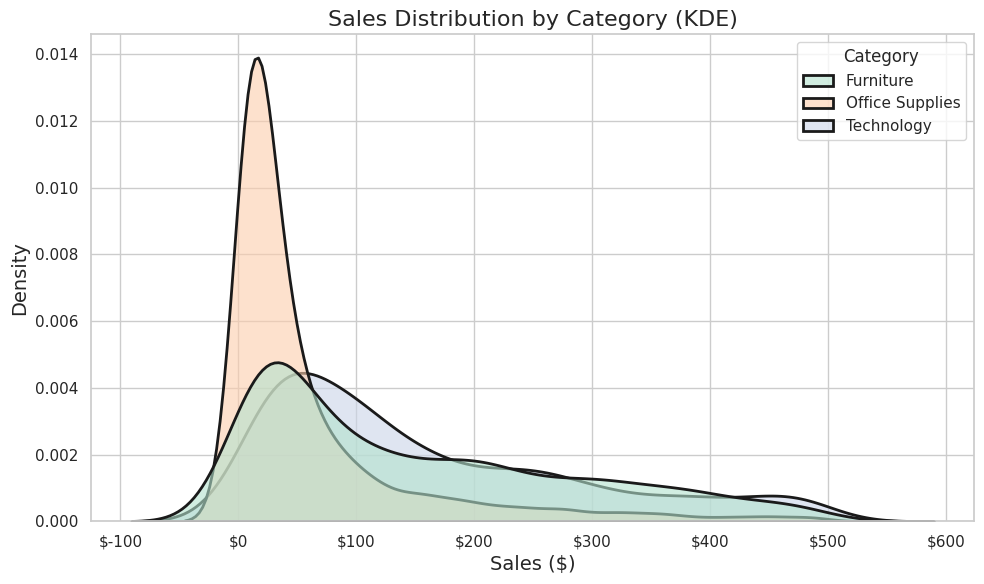

In [ ]:
# Set Seaborn theme
sns.set_theme(style="whitegrid", context="notebook")

# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=data,
    x="Sales",
    hue="Category", palette=palette,
    fill=True,
    common_norm=False,  # Avoid normalizing across categories
    alpha=0.6,  # Transparency for better overlap visibility
    linewidth=2, edgecolor='k'
)

# Add labels and title
plt.title("Sales Distribution by Category (KDE)", fontsize=16)
plt.xlabel("Sales ($)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Adjust layout
plt.tight_layout()
plt.show()


## Data Prep Utils Script

In [ ]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def remove_outliers_tukey(data, column, plot=True):
    """
    Removes outliers from a specified column in the dataset using Tukey's Fences (IQR Method),
    and optionally plots the data before and after outlier removal.

    Parameters:
    - data (DataFrame): The input dataset.
    - column (str): The column on which to perform outlier detection.
    - plot (bool): Whether to plot boxplots for the original and filtered data.

    Returns:
    - filtered_data (DataFrame): Dataset without outliers.
    - outliers (DataFrame): Outlier data points.
    """
    # Compute Q1, Q3, and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define fences
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Filter data
    filtered_data = data[(data[column] >= lower_fence) & (data[column] <= upper_fence)].copy()
    outliers = data[(data[column] < lower_fence) | (data[column] > upper_fence)].copy()

    # Print summary
    print(f"Column: {column}")
    print(f"Original Dataset: {len(data)} rows")
    print(f"Non-Outliers: {len(filtered_data)} rows ({len(filtered_data) / len(data) * 100:.2f}%)")
    print(f"Outliers: {len(outliers)} rows ({len(outliers) / len(data) * 100:.2f}%)")

    # Plotting
    if plot:
        sns.set_theme(style="whitegrid", context="notebook")

        # Boxplot for original data
        plt.figure(figsize=(8, 3))
        sns.boxplot(x=data[column], color='skyblue')
        plt.title(f"Original {column} Distribution (With Outliers)", fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.tight_layout()
        plt.show()

        # Boxplot for filtered data
        plt.figure(figsize=(8, 3))
        sns.boxplot(x=filtered_data[column], color='lightgreen')
        plt.title(f"Filtered {column} Distribution (Without Outliers)", fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.tight_layout()
        plt.show()

    return filtered_data, outliers



def preprocess_data(data):
    """
    Prepares and preprocesses the Superstore dataset by cleaning and deriving metrics.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Derived Metrics
    data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100
    data['Shipping Time (Days)'] = (data['Ship Date'] - data['Order Date']).dt.days
    data['Estimated Cost'] = data['Sales'] - data['Profit']
    data['Profitability Ratio'] = (data['Profit'] / data['Estimated Cost']) * 100
    data['Effective Price'] = data['Sales'] * (1 - data['Discount'])

    customer_metrics = data.groupby('Customer ID').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Order ID': 'nunique'  # Number of orders
    }).rename(columns={'Order ID': 'Order Count'})
    data = data.merge(customer_metrics, on='Customer ID', suffixes=('', '_Customer'))
    data['AOV'] = data['Sales_Customer'] / data['Order Count']

    region_sales = data.groupby('Region')['Sales'].sum()
    data['Regional Market Share (%)'] = (data['Region'].map(region_sales) / data['Sales'].sum()) * 100

    category_profit = data.groupby('Category')['Profit'].sum()
    subcategory_profit = data.groupby('Sub-Category')['Profit'].sum()
    data['Profit per Category'] = data['Category'].map(category_profit)
    data['Profit per Sub-Category'] = data['Sub-Category'].map(subcategory_profit)

    # Standardize specific columns (optional step)
    data['Shipping Time (Days)'] = data['Shipping Time (Days)'].astype(str).str.title()

    return data



def convert_to_category_and_visualize(data, threshold=25, exclude_columns=None):
    """
    Converts columns with fewer than 'threshold' unique values to 'category' dtype,
    excluding specified columns, and visualizes the unique value counts.
    """
    if exclude_columns is None:
        exclude_columns = []

    # Count unique values for each column
    unique_counts = data.nunique()

    # Identify columns to convert, excluding specified columns
    columns_to_convert = [
        col for col in unique_counts[unique_counts < threshold].index
        if col not in exclude_columns
    ]

    # Convert selected columns to 'category' dtype
    for column in columns_to_convert:
        data[column] = data[column].astype('category')

    # Filter for columns with fewer than threshold unique values for visualization
    filtered_counts = unique_counts[
        (unique_counts < threshold) & (~unique_counts.index.isin(exclude_columns))
    ]

    # Visualize unique value counts
    palette = sns.color_palette("Pastel2", len(filtered_counts))
    plt.figure(figsize=(9, 5))
    filtered_counts.sort_values(ascending=False).plot(
        kind='bar',
        color=palette,
        edgecolor='black'
    )
    plt.title('Unique Value Counts for Columns Converted to Category', fontsize=14)
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Number of Unique Categories', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Verify the conversions
    # print("\nColumns converted to 'category' dtype:")
    # for column in columns_to_convert:
    #     print(f"{column}: {data[column].dtype}")

    return data

def add_time_based_columns(data):
    """
    Adds time-based columns derived from Order Date and Ship Date to the dataset,
    and converts these columns to categorical type for analysis and visualization.
    Retains numeric month columns for reference.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Create new time-based columns
    data['Order Year'] = data['Order Date'].dt.year
    data['Order Month Numeric'] = data['Order Date'].dt.month
    data['Order Day'] = data['Order Date'].dt.day
    data['Order Weekday'] = data['Order Date'].dt.day_name()  # e.g., 'Monday', 'Tuesday'

    data['Ship Year'] = data['Ship Date'].dt.year
    data['Ship Month Numeric'] = data['Ship Date'].dt.month
    data['Ship Day'] = data['Ship Date'].dt.day
    data['Ship Weekday'] = data['Ship Date'].dt.day_name()

    # Convert numeric months to month names
    month_names = [
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ]
    data['Order Month'] = data['Order Month Numeric'].apply(lambda x: month_names[x - 1])
    data['Ship Month'] = data['Ship Month Numeric'].apply(lambda x: month_names[x - 1])

    # Ensure month columns are ordered categorical variables
    month_categories = pd.CategoricalDtype(categories=month_names, ordered=True)
    data['Order Month'] = data['Order Month'].astype(month_categories)
    data['Ship Month'] = data['Ship Month'].astype(month_categories)

    # Convert year columns to categorical
    data['Order Year'] = data['Order Year'].astype('category')
    data['Ship Year'] = data['Ship Year'].astype('category')

    # Convert other time-based columns to categorical
    time_columns = ['Order Day', 'Order Weekday', 'Ship Day', 'Ship Weekday']
    for column in time_columns:
        data[column] = data[column].astype('category')

    return data

def order_categorical_columns(data):
    """
    Assigns a specific order to key categorical columns for proper visualization and analysis.

    Args:
        data (pd.DataFrame): The dataset.

    Returns:
        pd.DataFrame: The updated dataset with ordered categorical columns.
    """
    # Define the specific order for weekdays
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Define the specific order for months
    month_order = [
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ]

    # Assign weekday order if the column exists
    if 'Order Weekday' in data.columns:
        data['Order Weekday'] = pd.Categorical(
            data['Order Weekday'],
            categories=weekday_order,
            ordered=True
        )

    # Assign month order if the column exists
    if 'Order Month' in data.columns:
        data['Order Month'] = pd.Categorical(
            data['Order Month'],
            categories=month_order,
            ordered=True
        )

    # Assign abbreviated month order if the column exists
    if 'Order Month Abbrev' in data.columns:
        abbrev_month_order = [
            "Jan", "Feb", "Mar", "Apr", "May", "Jun",
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
        ]
        data['Order Month Abbrev'] = pd.Categorical(
            data['Order Month Abbrev'],
            categories=abbrev_month_order,
            ordered=True
        )

    return data

def add_abbreviated_columns(data):
    """
    Adds abbreviated versions of 'Order Month' and 'Order Weekday' columns to the dataset,
    ensures they are stored as categorical types with the correct order.

    Args:
        data (pd.DataFrame): The dataset with ordered 'Order Month' and 'Order Weekday'.

    Returns:
        pd.DataFrame: The dataset with new abbreviated columns.
    """
    # Define abbreviations for months and weekdays
    month_order = {
        "January": "Jan", "February": "Feb", "March": "Mar", "April": "Apr",
        "May": "May", "June": "Jun", "July": "Jul", "August": "Aug",
        "September": "Sep", "October": "Oct", "November": "Nov", "December": "Dec"
    }

    weekday_order = {
        "Monday": "Mon", "Tuesday": "Tue", "Wednesday": "Wed", "Thursday": "Thu",
        "Friday": "Fri", "Saturday": "Sat", "Sunday": "Sun"
    }

    # Map abbreviations to create new columns
    data['Order Month Abbrev'] = data['Order Month'].map(month_order)
    data['Order Weekday Abbrev'] = data['Order Weekday'].map(weekday_order)

    # Ensure the new columns are categorical with the correct order
    abbrev_month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    abbrev_weekday_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

    data['Order Month Abbrev'] = pd.Categorical(
        data['Order Month Abbrev'],
        categories=abbrev_month_order,
        ordered=True
    )

    data['Order Weekday Abbrev'] = pd.Categorical(
        data['Order Weekday Abbrev'],
        categories=abbrev_weekday_order,
        ordered=True
    )

    return data

def standardize_categorical_columns(data):
    """
    Standardizes all categorical columns by converting their values to title case.
    Ensures consistent formatting across categorical data.
    """
    # Select all categorical columns
    categorical_columns = data.select_dtypes(include='category').columns

    # Apply title case to each categorical column
    for column in categorical_columns:
        if data[column].dtype.name == 'category':  # Ensure it's a category column
            # Convert to string, apply title case, and convert back to category
            data[column] = data[column].astype(str).str.title().astype('category')

    # Verify changes
    print("Standardized Categorical Columns:")
    for column in categorical_columns:
        print(f"{column}: {data[column].unique()}")

    return data

def standardize_selected_categorical_columns(data, columns):
    """
    Standardizes specific categorical columns by converting their values to title case
    and ensures the columns remain as 'category' dtype.
    """
    for column in columns:
        if column in data.columns:
            # Convert to string, apply title case, and convert back to category
            data[column] = data[column].astype(str).str.title().astype('category')
    return data


def remove_duplicates(data):
    """
    Removes duplicate rows from the dataset and reports the number of rows removed.
    """
    initial_shape = data.shape
    data = data.drop_duplicates()
    print(f"Removed {initial_shape[0] - data.shape[0]} duplicate rows.")
    return data

def prepare_data(
    data,
    outlier_column=None,
    exclude_columns=None,
    columns_to_standardize=None,
    threshold=25
):
    """
    Combines all data preparation steps into a single function for streamlined processing.

    Args:
        data (pd.DataFrame): The input dataset.
        outlier_column (str, optional): Column to perform outlier detection on.
        exclude_columns (list, optional): Columns to exclude from category conversion.
        columns_to_standardize (list, optional): Specific categorical columns to standardize.
        threshold (int, optional): Unique value threshold for category conversion. Default is 25.

    Returns:
        pd.DataFrame: The cleaned and preprocessed dataset.
    """
    if exclude_columns is None:
        exclude_columns = [
            'Profit per Category', 'Profit per Sub-Category',
            'Regional Market Share (%)', 'Quantity', 'Order Count'
        ]

    if columns_to_standardize is None:
        columns_to_standardize = ['Region', 'Category', 'Sub-Category']

    if outlier_column:
        print(f"Step 0: Removing outliers from column '{outlier_column}'...\n")
        data, outliers = remove_outliers_tukey(data, column=outlier_column, plot=True)
        print(f"Outliers detected: {len(outliers)} rows sequestered for separate analysis.\n")

    print("Step 1: Preprocessing the data...")
    data = preprocess_data(data)

    print("Step 2: Adding time-based columns...")
    data = add_time_based_columns(data)

    print("Step 3: Converting to category and visualizing...\n")
    data = convert_to_category_and_visualize(data, threshold=threshold, exclude_columns=exclude_columns)

    print("\nStep 4: Removing duplicates...")
    data = remove_duplicates(data)

    print("Step 5: Standardizing selected categorical columns...\n")
    data = standardize_selected_categorical_columns(data, columns_to_standardize)

    print("Step 6: Ordering categorical columns...")
    data = order_categorical_columns(data)

    print("Step 7: Adding abbreviated columns...")
    data = add_abbreviated_columns(data)

    print("Data preparation completed!")
    return data


'''

with open("data_prep_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_prep_utils.py")

# Import and reload the module to use its functions
import importlib
import data_prep_utils as dpu
importlib.reload(dpu)

Script successfully written to data_prep_utils.py


<module 'data_prep_utils' from '/content/data_prep_utils.py'>

## Data Visualization Utils

In [ ]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_sales_distribution(data, column='Sales', title='Sales Distribution Visualizations', color='lightgreen'):
    """
    Visualizes the distribution of a specified column with a barplot, boxplot, and histogram (with KDE).

    Args:
        data (pd.DataFrame): The dataset containing the sales data.
        column (str): The column to visualize. Default is 'Sales'.
        title (str): The title for the overall plot.
        color (str): The color for the visualizations. Default is 'lightgreen'.

    Returns:
        None: Displays the plots directly.
    """
    # Set Seaborn theme
    sns.set_theme(style="ticks", context="talk")

    # Create the figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1, 2]})

    # Barplot: Total sales
    total_value = data[column].sum()
    sns.barplot(x=[column], y=[total_value], color=color, edgecolor='k', ax=axes[0])
    axes[0].set_title(f"Total {column} (Barplot)", fontsize=14)
    axes[0].set_xlabel("")
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Boxplot: Distribution of sales
    sns.boxplot(y=data[column], color=color, showfliers=True, ax=axes[1], linecolor='k')
    axes[1].set_title(f"{column} Distribution (Boxplot)", fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("")

    # Histogram with KDE: Overall sales distribution
    sns.histplot(data=data, x=column, kde=True, color=color, ax=axes[2])
    axes[2].set_title(f"{column} Distribution (Histogram + KDE)", fontsize=14)
    axes[2].set_xlabel(column, fontsize=12)
    axes[2].set_ylabel("Frequency", fontsize=12)
    axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))
    axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=20, y=1.03)
    plt.show()


def calculate_stats(data, column, **kwargs):
    """
    Calculate descriptive statistics for a given column and return selected metrics.

    Args:
        data (pd.DataFrame): The dataset.
        column (str): Column name for which to calculate statistics.
        kwargs: Keyword arguments specifying which statistics to calculate.

    Returns:
        dict: Dictionary of selected descriptive statistics.
    """
    stats = {}

    # Calculate all available statistics
    all_stats = {
        "min": data[column].min(),
        "median": data[column].median(),
        "mean": data[column].mean(),
        "mode": data[column].mode().iloc[0],  # First mode
        "std": data[column].std(),
        "max": data[column].max(),
        "range": data[column].max() - data[column].min()
    }

    # Filter based on kwargs or include all if no kwargs specified
    if not kwargs:
        stats = all_stats  # Return all stats if no specific arguments provided
    else:
        stats = {stat: all_stats[stat] for stat, include in kwargs.items() if include}

    return stats

def plot_descriptive_stats(stats, column_name, color_palette="Pastel2"):
    """
    Visualizes descriptive statistics as a horizontal barplot, with the column name in the title.

    Args:
        stats (dict): Dictionary of descriptive statistics where keys are statistic names and values are their numeric values.
        column_name (str): Name of the column the statistics represent (e.g., 'Sales', 'Profit').
        color_palette (str): Seaborn color palette for the bars. Default is "Pastel2".

    Returns:
        None: Displays the plot directly.
    """
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Convert stats dictionary to DataFrame
    stats_df = pd.DataFrame(stats.items(), columns=["Statistic", "Value"])

    # Create the horizontal barplot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=stats_df,
        y="Statistic",  # Use y-axis for categories
        x="Value",  # Use x-axis for values
        hue="Statistic", palette=color_palette,
        edgecolor="black"
    )

    # Add value annotations to each bar
    for index, row in stats_df.iterrows():
        ax.text(
            row["Value"] + 5,  # Slightly offset to the right of the bar
            index,  # Position at the center of the bar
            f"${row['Value']:,.2f}",  # Format with full value
            va="center",  # Center vertically
            ha="left",  # Align text to the left of the bar
            fontsize=12
        )

    # Add labels and title
    plt.title(f"Descriptive Statistics for {column_name}", fontsize=16)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("")
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
    plt.tight_layout()
    plt.show()

'''

with open("data_visualization_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_visualization_utils.py")

# Import and reload the module to use its functions
import importlib
import data_visualization_utils as dvu
importlib.reload(dvu)

Script successfully written to data_visualization_utils.py


<module 'data_visualization_utils' from '/content/data_visualization_utils.py'>